In [51]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


In [1]:
#getting columns of intrest from the data rather than the whole dataset
salary=pd.read_csv(r'C:\Users\Ernest\Downloads\ds_salaries.csv',usecols= ['work_year', 'experience_level', 'employment_type','job_title','salary_in_usd','employee_residence', 'remote_ratio','company_location','company_size'])
salary.head()

NameError: name 'pd' is not defined

In [53]:
salary.columns.to_list()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [54]:
#checking to see the orientation of the data in terms of columns and rows
salary.shape

(607, 9)

In [55]:
#finding the number of nulls in the data
salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [56]:
#Transpose the data for easy readability
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,0.692133,2020.0,2021.0,2022.0,2022.0,2022.0
salary_in_usd,607.0,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,40.709130,0.0,50.0,100.0,100.0,100.0


In [57]:
salary.corr()

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


In [58]:
#Remote ratio
labels = ['No Remote','Partially Remote','Fully Remote']
values = salary['remote_ratio'].value_counts().to_list()
values

[381, 127, 99]

<BarContainer object of 3 artists>

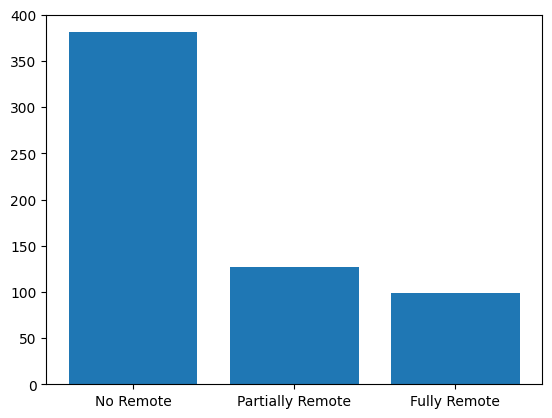

In [59]:
plt.bar(labels,values)

In [60]:
#checking distribution of remote jobs
salary.remote_ratio.value_counts(normalize=True).round(4)*100

100    62.77
0      20.92
50     16.31
Name: remote_ratio, dtype: float64

In [61]:
#Experience level
# Replace short forms with understandable labels
salary['experience_level'].replace('EN', 'Entry-level / Junior', inplace=True)
salary['experience_level'].replace('MI', 'Mid-level / Intermediate', inplace=True)
salary['experience_level'].replace('SE', 'Senior-level / Expert', inplace=True)
salary['experience_level'].replace('EX', 'Executive-level / Director', inplace=True)
salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level / Intermediate,FT,Data Scientist,79833,DE,0,DE,L
1,2020,Senior-level / Expert,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior-level / Expert,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid-level / Intermediate,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior-level / Expert,FT,Machine Learning Engineer,150000,US,50,US,L


In [62]:
employment_type=salary['employment_type'].unique()
employment_type

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [63]:
#emp_type
# Replace short forms with understandable labels
salary['employment_type'].replace('FT','Full-time', inplace=True)
salary['employment_type'].replace('FL','Freelance', inplace=True)
salary['employment_type'].replace('PT','Part-time', inplace=True)
salary['employment_type'].replace('CT','Contract', inplace=True)
salary.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level / Intermediate,Full-time,Data Scientist,79833,DE,0,DE,L
1,2020,Senior-level / Expert,Full-time,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,Senior-level / Expert,Full-time,Big Data Engineer,109024,GB,50,GB,M
3,2020,Mid-level / Intermediate,Full-time,Product Data Analyst,20000,HN,0,HN,S
4,2020,Senior-level / Expert,Full-time,Machine Learning Engineer,150000,US,50,US,L


In [64]:
salary['experience_level'].value_counts(normalize=True).round(4)*100


Senior-level / Expert         46.13
Mid-level / Intermediate      35.09
Entry-level / Junior          14.50
Executive-level / Director     4.28
Name: experience_level, dtype: float64

In [65]:
salary.employment_type.value_counts(normalize=True).round(4)*100

Full-time    96.87
Part-time     1.65
Contract      0.82
Freelance     0.66
Name: employment_type, dtype: float64

In [66]:
#List of job titles
# Get label and values for top 5 job titles 
top_roles = salary['job_title'].value_counts()[:5]
top_roles

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

<BarContainer object of 5 artists>

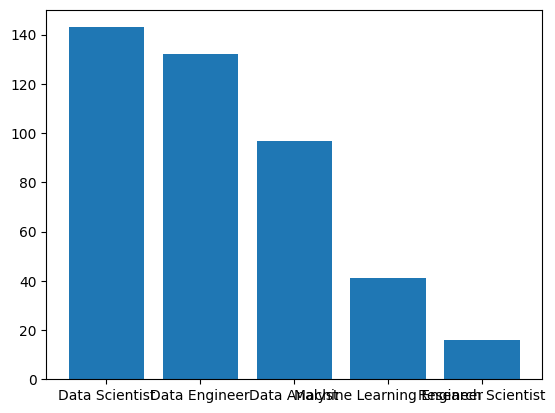

In [67]:
#plot a bar chart to display the jobs
x = top_roles.index
y = top_roles.values
plt.bar(x,y,width=0.8,align='center',data=salary)

In [68]:
#Countries with the most data related jobs
country=salary['company_location'].unique()
country

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [69]:
# Get label and values for top countries 
top_countries = salary['company_location'].value_counts()[:5]
top_countries

US    355
GB     47
CA     30
DE     28
IN     24
Name: company_location, dtype: int64

<BarContainer object of 5 artists>

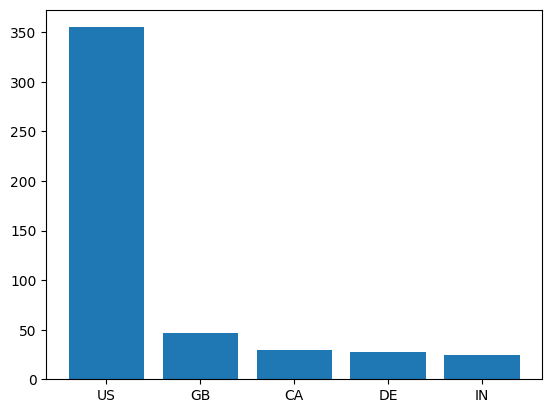

In [70]:
#plot a bargraph of top coutries with regards to salary
x=top_countries.index 
y=top_countries.values
plt.bar(x,y,width=0.8,align='center',data=salary)

##Relationship btw Salary and work year

In [71]:
# Group data by year
year_2020 = salary.loc[(salary['work_year'] == 2020)]
year_2021 = salary.loc[(salary['work_year'] == 2021)]
year_2022 = salary.loc[(salary['work_year'] == 2022)]

In [72]:
# Find mean of salary for each work year
work_y_sal = pd.DataFrame(columns=['2020','2021','2022'])
work_y_sal['2020'] = year_2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
work_y_sal['2021'] = year_2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
work_y_sal['2022'] = year_2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
work_y_sal

,2020,2021,2022
0,95813.0,99853.792627,124522.006289


In [73]:
#correlation btw variables with regards to salary in usd
salary.corr()['salary_in_usd']

work_year        0.170493
salary_in_usd    1.000000
remote_ratio     0.132122
Name: salary_in_usd, dtype: float64

#Relationship between salary and experience level

In [74]:
# Getting data for salary and experience level
exp_sal=salary[['experience_level', 'salary_in_usd']]
#salary by experience level
entry_level = exp_sal.loc[exp_sal['experience_level']=='Entry-level / Junior']
mid_level   = exp_sal.loc[exp_sal['experience_level']=='Mid-level / Intermediate']
senior_level= exp_sal.loc[exp_sal['experience_level']=='Senior-level / Expert']
executive_level= exp_sal.loc[exp_sal['experience_level']=='Executive-level / Director']
exp_sal

,experience_level,salary_in_usd
0,Mid-level / Intermediate,79833
1,Senior-level / Expert,260000
2,Senior-level / Expert,109024
3,Mid-level / Intermediate,20000
4,Senior-level / Expert,150000
...,...,...
602,Senior-level / Expert,154000
603,Senior-level / Expert,126000
604,Senior-level / Expert,129000
605,Senior-level / Expert,150000


In [103]:
#finding mean salary with regards to experience level
lab=['EntryLevel','MidLevel','SeniorLevel','Executive-Level']
values = [entry_level['salary_in_usd'].mean(), mid_level['salary_in_usd'].mean(),
         senior_level['salary_in_usd'].mean(), executive_level['salary_in_usd'].mean()]
mean_salary=pd.DataFrame(values,lab)
mean_salary.T

,EntryLevel,MidLevel,SeniorLevel,Executive-Level
0,61643.318182,87996.056338,138617.292857,199392.038462


<BarContainer object of 4 artists>

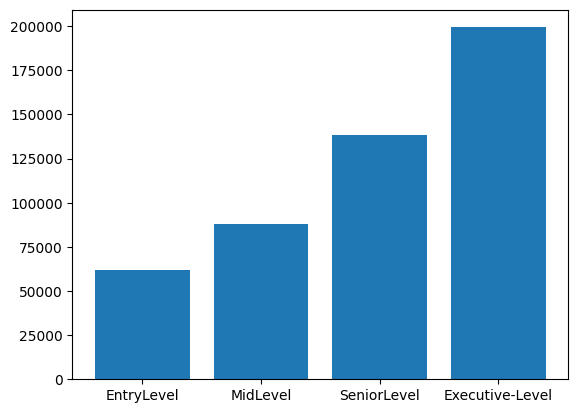

In [104]:
plt.bar(lab,values)

##Distribution of salary by company size

In [111]:
co_sal = salary[['salary_in_usd', 'company_size']]
# Get salaries in clusters of size of companies
sal_S = co_sal.loc[co_sal['company_size'] == 'S']
sal_M = co_sal.loc[co_sal['company_size'] == 'M']
sal_L = co_sal.loc[co_sal['company_size'] == 'L']
labels = ['Small', 'Medium', 'Large']

In [116]:
# Get the mean salary by company size
sal_mean = [sal_S['salary_in_usd'].mean(), sal_M['salary_in_usd'].mean(),
            sal_L['salary_in_usd'].mean()]
mean_salaryper_co=pd.DataFrame(sal_mean,labels)
mean_salaryper_co.T

,Small,Medium,Large
0,77632.674699,116905.466258,119242.994949


<BarContainer object of 3 artists>

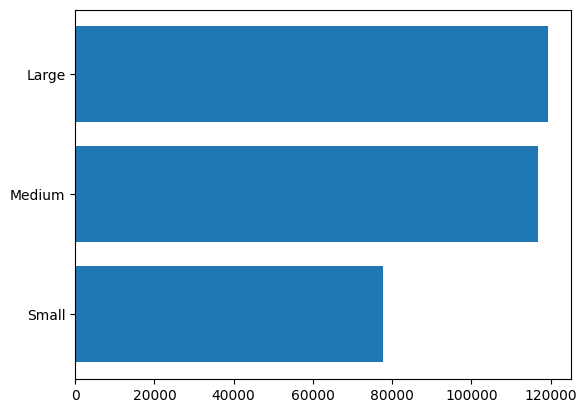

In [117]:
plt.barh(labels,sal_mean)

In [124]:
#Work Year and remote ratio
wy_rem = salary[['work_year', 'remote_ratio']]

#data by work year
year_20 = wy_rem.loc[wy_rem['work_year'] == 2020]
year_21 = wy_rem.loc[wy_rem['work_year'] == 2021]
year_22 = wy_rem.loc[wy_rem['work_year'] == 2022]

# Remote ratio by year
remote_ratio_year_20 = year_20['remote_ratio'].value_counts().values
remote_ratio_year_21 = year_21['remote_ratio'].value_counts().values
remote_ratio_year_22 = year_22['remote_ratio'].value_counts().values

In [130]:
labels = ['No Remote','Partially Remote','Fully Remote']
myexplode = [0, 0.1, 0]

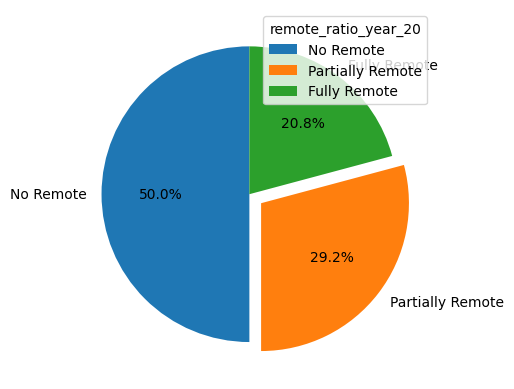

In [136]:
#remote_ratio by year_20
plt.pie(remote_ratio_year_20,labels=labels,startangle=90,explode = myexplode, autopct="%2.1f%%")
plt.legend(title="remote_ratio_year_20")

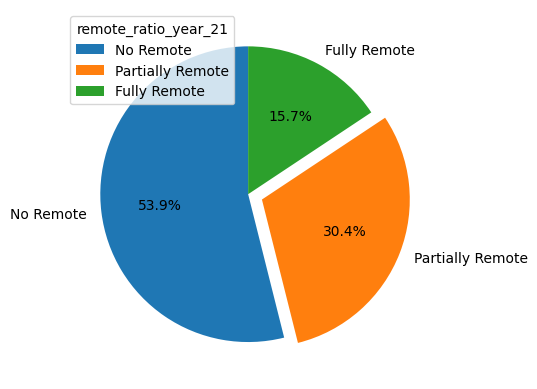

In [135]:
#remote_ratio by year_21
plt.pie(remote_ratio_year_21,labels=labels,startangle=90,explode = myexplode,autopct="%2.1f%%")
plt.legend(title="remote_ratio_year_21")

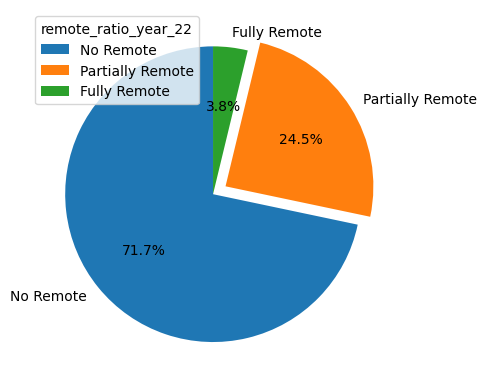

In [134]:
#remote_ratio by year_22
plt.pie(remote_ratio_year_22,labels=labels,startangle=90,explode = myexplode,autopct="%2.1f%%")
plt.legend(title="remote_ratio_year_22")

In [84]:
salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [85]:
#Get the data in csv to allow for further analysis and or visualization
salary[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size']].to_csv('salary_transformed.CSV')